

> 스타벅스, 이디야 위치 분석하기


*   각 구별 스타벅스와 이디야의 점포수 분석
*   스타벅스 주변에는 이디야가 있는가?






#지도 한글 설정

In [ ]:
! pip uninstall -y datascience

In [ ]:
! pip uninstall -y branca

Uninstalling branca-0.4.1+3.g5887b9b:
  Successfully uninstalled branca-0.4.1+3.g5887b9b


In [ ]:
!pip install git+https://github.com/python-visualization/branca.git@master

  Cloning https://github.com/python-visualization/branca.git (to revision master) to /tmp/pip-req-build-jvxtyqz6
  Running command git clone -q https://github.com/python-visualization/branca.git /tmp/pip-req-build-jvxtyqz6
  Created wheel for branca: filename=branca-0.4.1+3.g5887b9b-cp36-none-any.whl size=24523 sha256=20cae9b74e641c83dcca3174e976dd657bf15e9c2df49ab8b0595ff66546d519
  Stored in directory: /tmp/pip-ephem-wheel-cache-0gj4wm_2/wheels/14/bc/41/d6078abe73beea93d98c014bba54c395224cabb54f95b9d248
Successfully built branca


#그래프 관련 객체 및 그래프 한글 설정

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
%config InlineBackend.figure_format = 'retina' #그래프의 글자를 선명하게 출력하도록 설정 
!apt -qq -y install fonts-nanum #나눔 글자체 설치 

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' #나눔고딕 글자체의 전체 경로 설정
font = fm.FontProperties(fname=fontpath, size=9) #글자체의 경로와 글자 크기 설정

plt.rc('font', family='NanumBarunGothic')  #폰트 이름 설정
mpl.font_manager._rebuild() #폰트 업데이트

In [ ]:
plt.style.use("ggplot") #ggplot 스타일을 사용하도록 설정

#데이터 로드

In [ ]:
from google.colab import drive
drive.mount("/gdrive")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
%ls /gdrive/My\ Drive/Colab\ Notebooks #구글 드라이브 폴더 조회(폴더 내 파일명 출력)

 0622_1                     '0709 대중교통'
 0622_2                     '0709 아파트.ipynb'
 0622_3                     '0709 자습 PART7 머신러닝 - 회귀분석'
 0623_1                     '0709 자습 PART7 머신러닝-의사결정나무'
 0623_2                     '0709 자습 PART7 머신러닝 - KMeans'
 0624_1                     '0709 자습 PART7 머신러닝 - KNN, SVM.ipynb'
 0624_2                     '0710 PART4(0713 수업)'
 0625_1                     '0710 자습 PART7 머신러닝 - DBSCAN.ipynb'
 0625_2                     '0713 분산, 공분산, 상관관계'
'0626_1 '                   '0713 CCTV'
 0626_2                     '0715 지도 시각화'
 0629                       '0715 스타벅스, 이디야'
 0630                       '0715 상권 정보 분석.ipynb'
'0630 데이터 크롤링'        '0716 카페_부산'
 0701                        상가업소정보_201912.csv
'0701 복습'                 'Colaboratory HELP'
'0701 쇼핑몰 크롤링.ipynb'   shop.csv
'0708 Pandas'                w

In [ ]:
df = pd.read_csv("/gdrive/My Drive/Colab Notebooks/상가업소정보_201912.csv", encoding = "UTF-8") #데이터 로드

In [ ]:
df

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1.168010e+18,1,대지,604,NaN,서울특별시 강남구 대치동 604,1.168020e+11,서울특별시 강남구 남부순환로,2933,NaN,1.168010e+24,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1.0,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1.168010e+18,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,1.168040e+11,서울특별시 강남구 선릉로93길,6,NaN,1.168010e+24,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1.0,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1.154510e+18,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,1.154530e+11,서울특별시 금천구 가산로,34,6.0,1.154510e+24,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1.0,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2.653010e+18,1,대지,578,NaN,부산광역시 사상구 괘법동 578,2.653030e+11,부산광역시 사상구 괘감로,37,NaN,2.653010e+24,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1.0,26.0,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1.171010e+18,1,대지,256,NaN,서울특별시 송파구 석촌동 256,1.171030e+11,서울특별시 송파구 가락로,71,NaN,1.171010e+24,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1.0,NaN,127.104071,37.500249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573675,16394290,비파티세리공덕,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,11,서울특별시,11440,마포구,1144056500,공덕동,1144010200,공덕동,1.144010e+18,1,대지,105,67.0,서울특별시 마포구 공덕동 105-67,1.144040e+11,서울특별시 마포구 마포대로14길,4,NaN,1.144010e+24,NaN,서울특별시 마포구 마포대로14길 4,121801,4211.0,NaN,NaN,NaN,126.955059,37.548618
573676,16336474,앤탑PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11200,성동구,1120069000,성수2가3동,1120011500,성수동2가,1.120010e+18,1,대지,289,15.0,서울특별시 성동구 성수동2가 289-15,1.120040e+11,서울특별시 성동구 성수일로8길,37,NaN,1.120010e+24,으뜸프린팅(주),서울특별시 성동구 성수일로8길 37,133834,4794.0,NaN,2.0,NaN,127.054615,37.545853
573677,16336218,오즈아레나PC방,NaN,N,관광/여가/오락,N01,PC/오락/당구/볼링등,N01A01,인터넷PC방,R91222,컴퓨터 게임방 운영업,11,서울특별시,11680,강남구,1168052100,논현1동,1168010800,논현동,1.168010e+18,1,대지,165,8.0,서울특별시 강남구 논현동 165-8,1.168020e+11,서울특별시 강남구 강남대로,492,NaN,1.168010e+24,한맥빌딩,서울특별시 강남구 강남대로 492,135825,6119.0,NaN,2.0,NaN,127.024102,37.506202
573678,16335152,파인트리네일,NaN,F,생활서비스,F01,이/미용/건강,F01A02,발/네일케어,S96119,기타미용업,11,서울특별시,11560,영등포구,1156054000,여의동,1156011000,여의도동,1.156010e+18,1,대지,23,NaN,서울특별시 영등포구 여의도동 23,1.156030e+11,서울특별시 영등포구 국제금융로,10,NaN,1.156010e+24,서울국제금융센터,서울특별시 영등포구 국제금융로 10,150945,7326.0,NaN,1.0,NaN,126.924863,37.525172


#데이터 조회

In [ ]:
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11680,강남구,1168060000,대치1동,1168010600,대치동,1.168010e+18,1,대지,604,NaN,서울특별시 강남구 대치동 604,1.168020e+11,서울특별시 강남구 남부순환로,2933,NaN,1.168010e+24,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1.0,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11680,강남구,1168064000,역삼1동,1168010100,역삼동,1.168010e+18,1,대지,696,42.0,서울특별시 강남구 역삼동 696-42,1.168040e+11,서울특별시 강남구 선릉로93길,6,NaN,1.168010e+24,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1.0,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,기타 주점업,11,서울특별시,11545,금천구,1154563000,독산3동,1154510200,독산동,1.154510e+18,1,대지,162,1.0,서울특별시 금천구 독산동 162-1,1.154530e+11,서울특별시 금천구 가산로,34,6.0,1.154510e+24,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1.0,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,"피자, 햄버거, 샌드위치 및 유사 음식점업",26,부산광역시,26530,사상구,2653062000,괘법동,2653010400,괘법동,2.653010e+18,1,대지,578,NaN,부산광역시 사상구 괘법동 578,2.653030e+11,부산광역시 사상구 괘감로,37,NaN,2.653010e+24,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1.0,26.0,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,욕탕업,11,서울특별시,11710,송파구,1171060000,석촌동,1171010500,석촌동,1.171010e+18,1,대지,256,NaN,서울특별시 송파구 석촌동 256,1.171030e+11,서울특별시 송파구 가락로,71,NaN,1.171010e+24,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1.0,NaN,127.104071,37.500249


In [ ]:
df.info() #데이터의 전체적인 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

#사용하지 않는 컬럼 삭제

In [ ]:
#사용할 컬럼만 따로 모아서 확인
column_name = ["상호명", "상권업종대분류명", "상권업종중분류명", "도로명주소", "시도명", "시군구명", "경도", "위도"]

In [ ]:
df = df[column_name]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   도로명주소     573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   경도        573680 non-null  float64
 7   위도        573680 non-null  float64
dtypes: float64(2), object(6)
memory usage: 35.0+ MB


#조건에 맞는 데이터 조회

##서울만 따로 보기

In [ ]:
df_seoul = df[df["시도명"] == "서울특별시"].copy() #copy(): 새로운 변수에 데이터프레임 복사본을 할당

In [ ]:
df_seoul

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도
0,와라와라호프,음식,유흥주점,서울특별시 강남구 남부순환로 2933,서울특별시,강남구,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,서울특별시 강남구 선릉로93길 6,서울특별시,강남구,127.047883,37.505675
2,프로포즈,음식,유흥주점,서울특별시 금천구 가산로 34-6,서울특별시,금천구,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,서울특별시 송파구 가락로 71,서울특별시,송파구,127.104071,37.500249
5,초밥왕,음식,일식/수산물,서울특별시 송파구 올림픽로 293-19,서울특별시,송파구,127.102490,37.515149
...,...,...,...,...,...,...,...,...
573675,비파티세리공덕,음식,한식,서울특별시 마포구 마포대로14길 4,서울특별시,마포구,126.955059,37.548618
573676,앤탑PC방,관광/여가/오락,PC/오락/당구/볼링등,서울특별시 성동구 성수일로8길 37,서울특별시,성동구,127.054615,37.545853
573677,오즈아레나PC방,관광/여가/오락,PC/오락/당구/볼링등,서울특별시 강남구 강남대로 492,서울특별시,강남구,127.024102,37.506202
573678,파인트리네일,생활서비스,이/미용/건강,서울특별시 영등포구 국제금융로 10,서울특별시,영등포구,126.924863,37.525172


## 일부 텍스트가 들어가 있는 데이터만 가져오기 


*   상호명에서 브랜드명 추출
*   오타 방지를 위해 스타벅스(STARBUCKS), 이디야(EDIYA)



In [ ]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower() #"상호명 컬럼"에 저장된 영어를 소문자로 변환, 새로운 컬럼 "상호명_소문자"에 저장

In [ ]:
df_seoul[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya")] #"상호명_소문자" 컬럼에서 이디야, 이디아, 또는 ediya 문자열을 포함한 행만 조회

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자
1675,이디야커피,음식,커피점/카페,서울특별시 영등포구 영등포로 353,서울특별시,영등포구,126.918062,37.515118,이디야커피
2957,이디야커피,음식,커피점/카페,서울특별시 구로구 디지털로32길 43,서울특별시,구로구,126.897870,37.484385,이디야커피
8534,이디야커피,음식,커피점/카페,서울특별시 노원구 노원로22길 34,서울특별시,노원구,127.072754,37.646364,이디야커피
13913,이디아,음식,커피점/카페,서울특별시 마포구 월드컵북로 375,서울특별시,마포구,126.890828,37.577397,이디아
14605,이디야커피,음식,커피점/카페,서울특별시 성동구 장터길 17-1,서울특별시,성동구,127.017791,37.548427,이디야커피
...,...,...,...,...,...,...,...,...,...
557161,이디야커피,음식,커피점/카페,서울특별시 은평구 불광로 59,서울특별시,은평구,126.931719,37.612329,이디야커피
557163,이디야커피,음식,커피점/카페,서울특별시 광진구 능동로 90,서울특별시,광진구,127.070902,37.538350,이디야커피
557498,이디야커피,음식,커피점/카페,서울특별시 강서구 공항대로 247,서울특별시,강서구,126.835118,37.559191,이디야커피
565196,이디아스포츠,소매,운동/경기용품소매,서울특별시 금천구 디지털로 121,서울특별시,금천구,126.880083,37.476127,이디아스포츠


In [ ]:
df_seoul[df_seoul["상호명_소문자"].str.contains("스타벅스|starbuks")] #"상호명_소문자" 컬럼에서 스타벅스 또는 starbucks 문자열을 포함한 행만 조회

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자
1104,스타벅스,음식,커피점/카페,서울특별시 용산구 이태원로 188,서울특별시,용산구,126.994781,37.534303,스타벅스
2023,스타벅스종로3가점,음식,커피점/카페,서울특별시 종로구 종로 113-1,서울특별시,종로구,126.990207,37.570585,스타벅스종로3가점
2770,스타벅스,음식,커피점/카페,서울특별시 서초구 강남대로 581,서울특별시,서초구,127.019763,37.513663,스타벅스
14770,스타벅스커피여의도IFC1F,음식,커피점/카페,서울특별시 영등포구 국제금융로 10,서울특별시,영등포구,126.924863,37.525172,스타벅스커피여의도ifc1f
14781,스타벅스,음식,커피점/카페,서울특별시 강남구 테헤란로103길 9,서울특별시,강남구,127.063878,37.510038,스타벅스
...,...,...,...,...,...,...,...,...,...
563387,스타벅스,음식,커피점/카페,서울특별시 용산구 한강대로 69,서울특별시,용산구,126.965220,37.527452,스타벅스
567090,스타벅스,음식,커피점/카페,서울특별시 관악구 관악로 158,서울특별시,관악구,126.952792,37.479298,스타벅스
567828,스타벅스,음식,커피점/카페,서울특별시 성동구 동호로 99,서울특별시,성동구,127.015329,37.548028,스타벅스
570096,스타벅스,음식,커피점/카페,서울특별시 서대문구 북아현로 29,서울특별시,서대문구,126.956144,37.560080,스타벅스


In [ ]:
#위 두가지가 병합된 복사본을 만들어 새로운 변수에 저장
df_cafe = df_seoul[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks|이디야|이디아|ediya")].copy()

In [ ]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자
1104,스타벅스,음식,커피점/카페,서울특별시 용산구 이태원로 188,서울특별시,용산구,126.994781,37.534303,스타벅스
1675,이디야커피,음식,커피점/카페,서울특별시 영등포구 영등포로 353,서울특별시,영등포구,126.918062,37.515118,이디야커피
2023,스타벅스종로3가점,음식,커피점/카페,서울특별시 종로구 종로 113-1,서울특별시,종로구,126.990207,37.570585,스타벅스종로3가점
2770,스타벅스,음식,커피점/카페,서울특별시 서초구 강남대로 581,서울특별시,서초구,127.019763,37.513663,스타벅스
2957,이디야커피,음식,커피점/카페,서울특별시 구로구 디지털로32길 43,서울특별시,구로구,126.897870,37.484385,이디야커피
...,...,...,...,...,...,...,...,...,...
567090,스타벅스,음식,커피점/카페,서울특별시 관악구 관악로 158,서울특별시,관악구,126.952792,37.479298,스타벅스
567828,스타벅스,음식,커피점/카페,서울특별시 성동구 동호로 99,서울특별시,성동구,127.015329,37.548028,스타벅스
568636,이디야커피,음식,커피점/카페,서울특별시 서초구 바우뫼로 20,서울특별시,서초구,127.025274,37.469980,이디야커피
570096,스타벅스,음식,커피점/카페,서울특별시 서대문구 북아현로 29,서울특별시,서대문구,126.956144,37.560080,스타벅스


In [ ]:
#커피 전문점이 아닌 곳 존재
#df_cafe.loc[df_cafe["상호명_소문자"] == "이디아스포츠"]
#df_cafe.loc[df_cafe["상권업종중분류명"] != "커피점/카페"]

In [ ]:
df_cafe = df_cafe[df_cafe["상권업종중분류명"] == "커피점/카페"]

In [ ]:
#df_cafe.loc[df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), :]
#"상호명_소문자" 컬럼에서 스타벅스, starbucks 를 포함한 행만을 대상으로 > "브랜드명" 컬럼을 만들고 조건을 만족한 각 행에 스타벅스를 대입 
df_cafe.loc[df_cafe["상호명_소문자"].str.contains("스타벅스|starbucks"), "브랜드명"] = "스타벅스"
df_cafe["브랜드명"] = df_cafe["브랜드명"].fillna("이디야") #fillna() 함수: "브랜드명" 컬럼의 NaN 데이터에 이디야 저장

#df_cafe["브랜드명"] #"브랜드명" 컬럼 조회

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [ ]:
df_cafe

,상호명,상권업종대분류명,상권업종중분류명,도로명주소,시도명,시군구명,경도,위도,상호명_소문자,브랜드명
1104,스타벅스,음식,커피점/카페,서울특별시 용산구 이태원로 188,서울특별시,용산구,126.994781,37.534303,스타벅스,스타벅스
1675,이디야커피,음식,커피점/카페,서울특별시 영등포구 영등포로 353,서울특별시,영등포구,126.918062,37.515118,이디야커피,이디야
2023,스타벅스종로3가점,음식,커피점/카페,서울특별시 종로구 종로 113-1,서울특별시,종로구,126.990207,37.570585,스타벅스종로3가점,스타벅스
2770,스타벅스,음식,커피점/카페,서울특별시 서초구 강남대로 581,서울특별시,서초구,127.019763,37.513663,스타벅스,스타벅스
2957,이디야커피,음식,커피점/카페,서울특별시 구로구 디지털로32길 43,서울특별시,구로구,126.897870,37.484385,이디야커피,이디야
...,...,...,...,...,...,...,...,...,...,...
567090,스타벅스,음식,커피점/카페,서울특별시 관악구 관악로 158,서울특별시,관악구,126.952792,37.479298,스타벅스,스타벅스
567828,스타벅스,음식,커피점/카페,서울특별시 성동구 동호로 99,서울특별시,성동구,127.015329,37.548028,스타벅스,스타벅스
568636,이디야커피,음식,커피점/카페,서울특별시 서초구 바우뫼로 20,서울특별시,서초구,127.025274,37.469980,이디야커피,이디야
570096,스타벅스,음식,커피점/카페,서울특별시 서대문구 북아현로 29,서울특별시,서대문구,126.956144,37.560080,스타벅스,스타벅스


#시각화

In [ ]:
df_cafe["브랜드명"].value_counts() #"브랜드명"으로 각 카페의 갯수 파악

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

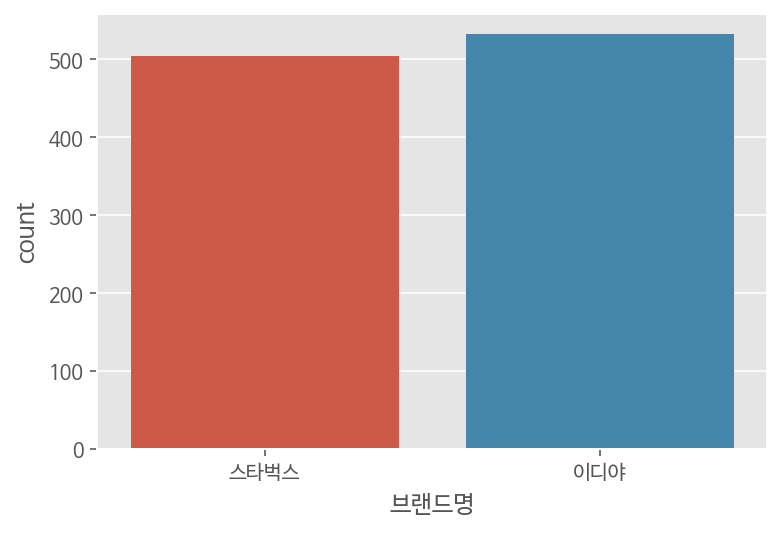

In [ ]:
sns.countplot(data = df_cafe, x = "브랜드명") #막대그래프화 - 점포수 비슷

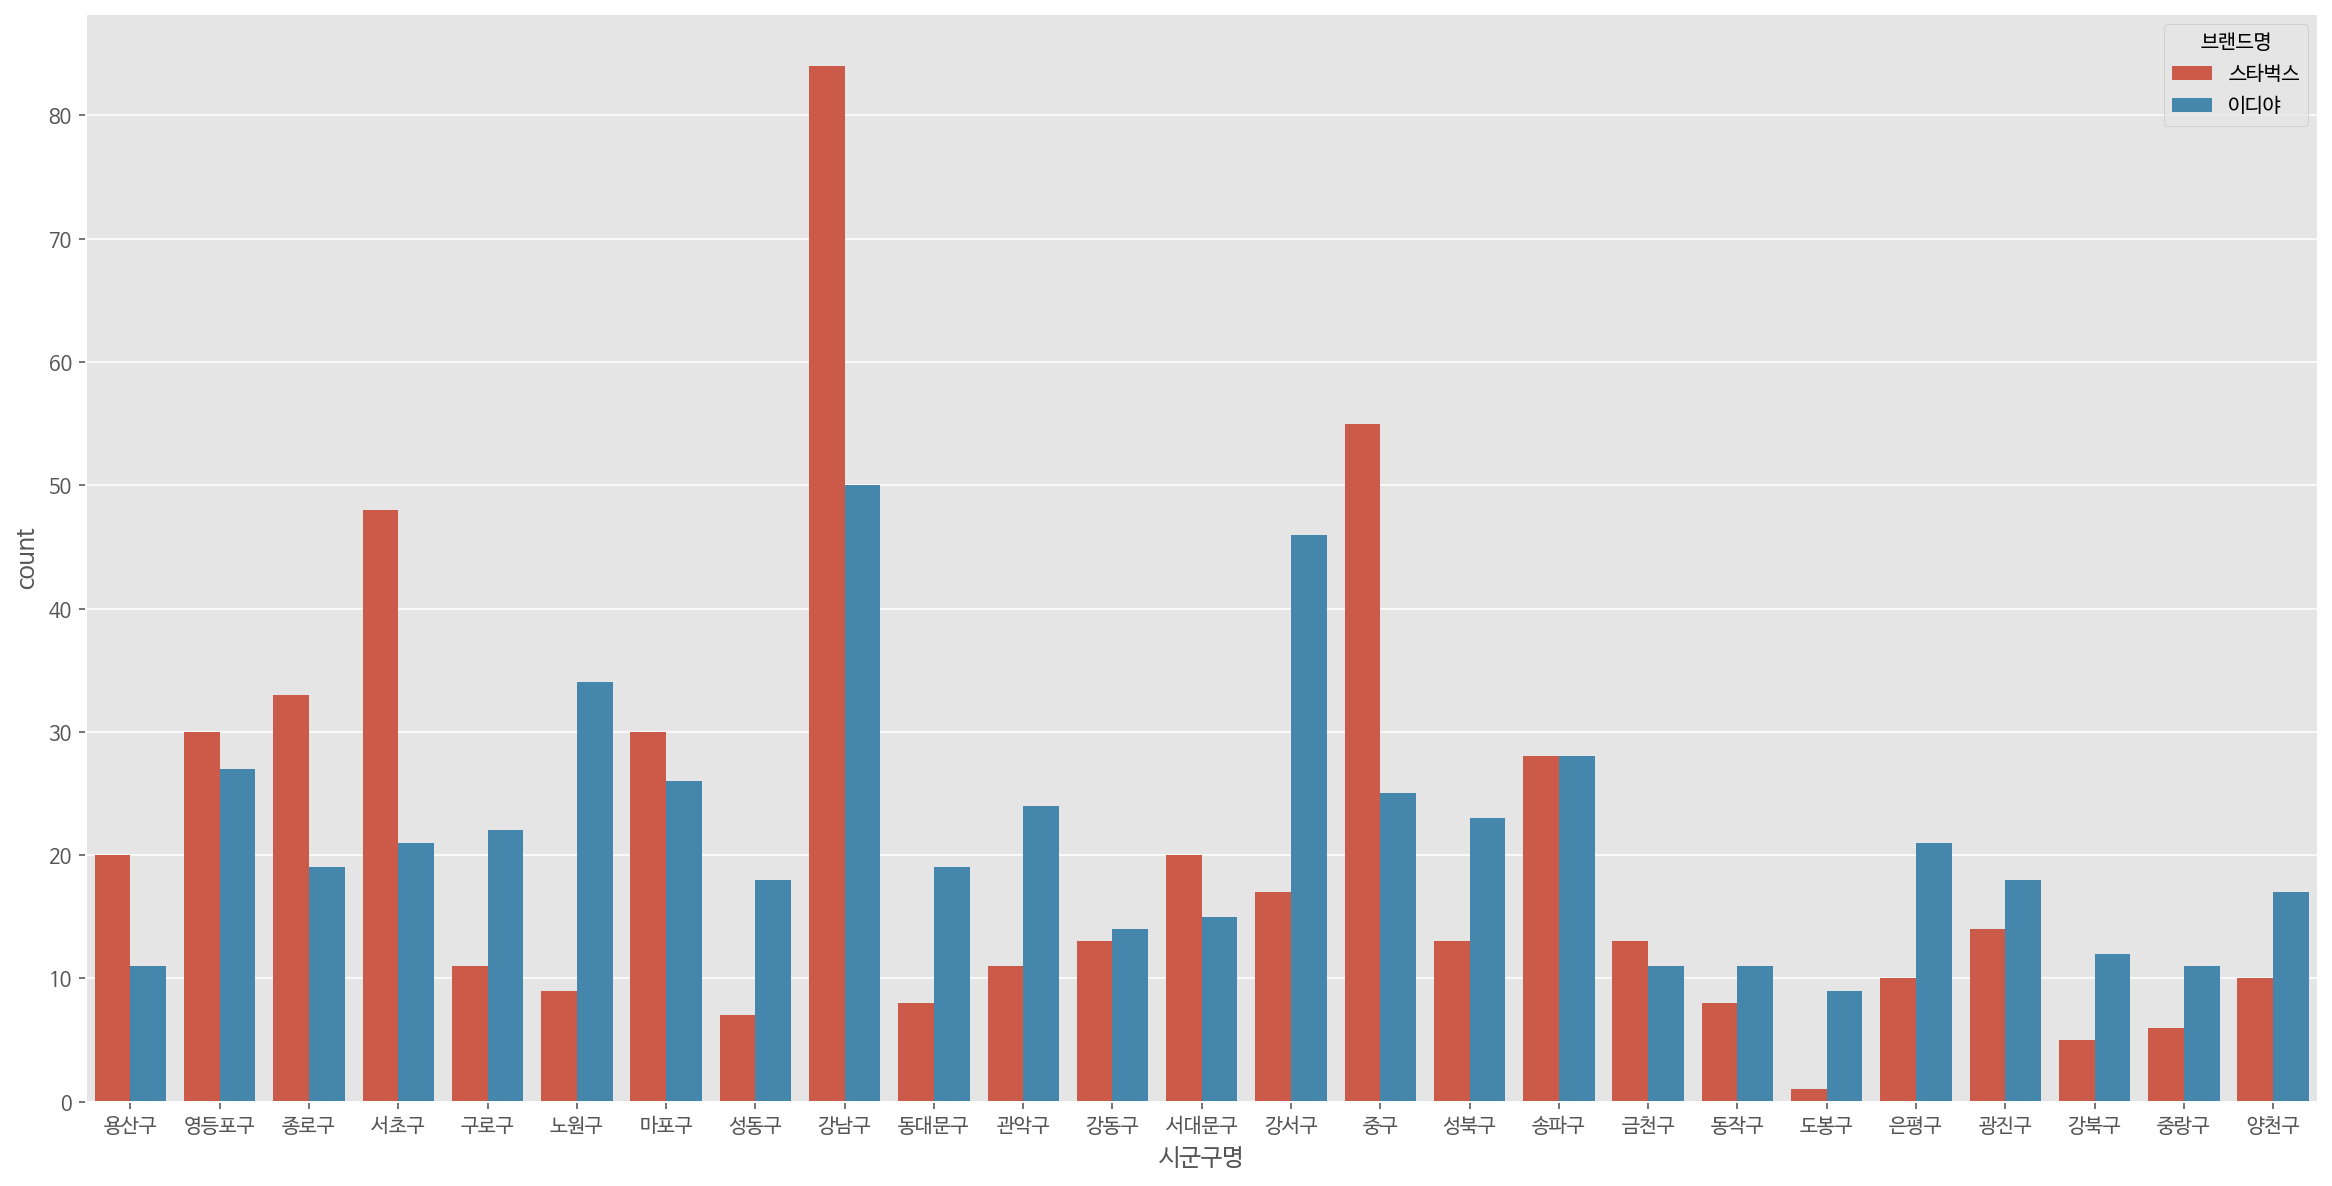

In [ ]:
plt.figure(figsize = (20, 10))
sns.countplot(data = df_cafe, x = "시군구명", hue = "브랜드명") #각 시군구별 두 카페의 개수

## 구별 브랜드별 점포수


### groupby로 구별 매장수 구하기

In [ ]:
df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
      이디야     12
강서구   스타벅스    17
      이디야     46
관악구   스타벅스    11
      이디야     24
광진구   스타벅스    14
      이디야     18
구로구   스타벅스    11
      이디야     22
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     34
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     8
      이디야     11
마포구   스타벅스    30
      이디야     26
서대문구  스타벅스    20
      이디야     15
서초구   스타벅스    48
      이디야     21
성동구   스타벅스     7
      이디야     18
성북구   스타벅스    13
      이디야     23
송파구   스타벅스    28
      이디야     28
양천구   스타벅스    10
      이디야     17
영등포구  스타벅스    30
      이디야     27
용산구   스타벅스    20
      이디야     11
은평구   스타벅스    10
      이디야     21
종로구   스타벅스    33
      이디야     19
중구    스타벅스    55
      이디야     25
중랑구   스타벅스     6
      이디야     11
Name: 상호명, dtype: int64

In [ ]:
df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count().unstack() #구별로 브랜드별 점포수를 구함 

브랜드명,스타벅스,이디야
시군구명,,
강남구,84,50
강동구,13,14
강북구,5,12
강서구,17,46
관악구,11,24
광진구,14,18
구로구,11,22
금천구,13,11
노원구,9,34


#지도 시각화

In [ ]:
import folium

## 스타벅스, 이디야 카페 매장 전체 분포

In [ ]:
len(df_cafe) #df_cafe에 저장된 데이터의 수

1036

In [ ]:
m = folium.Map(
    location = [df_cafe["위도"].mean(), #"위도" 컬럼의 평균을 대입
                df_cafe["경도"].mean() #"경도" 컬럼의 평균을 대입
                ],
    zoom_start = 12, 
    tiles = "Stamen Toner")

for i in range(len(df_cafe)):
  sub_lat = df_cafe["위도"].iloc[i] #위도 컬럼의 i번째 데이터
  sub_long = df_cafe["경도"].iloc[i] #경도 컬럼의 i번째 데이터

  #상호명-도로명 주소를 "title" 변수에 대입
  title = df_cafe["상호명"].iloc[i] + "-" + df_cafe["도로명주소"].iloc[i]

  if df_cafe["브랜드명"].iloc[i] == "이디야": #"브랜드명"에 따라 원 마커의 색 설정
    circle_color = "blue"
  else:
    circle_color = "green"

  folium.CircleMarker(
      [sub_lat, sub_long],
      radius = 5,
      color = circle_color,
      tooltip = title,
      fill = True,
      fill_color = circle_color,
      fill_opacity = 0.7
  ).add_to(m)

In [ ]:
m